In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df =pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [24]:
def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

Which product category tends to have the highest median price? Don't filter here by top categories.

# Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.


df = outlier_slayer(df)

In [82]:
# media de precios por categoría
media_categoria = df.groupby('category')['price'].mean().sort_values(ascending=False).reset_index()
media_categoria.head(10)

,category,price
0,Laptops,1087.987827
1,3D Printers,1018.036129
2,Desktop PCs,926.816064
3,Home Office Furniture,622.135898
4,Test & Measurement,559.382973
5,Home Audio Record Players,529.665585
6,CPUs,514.519317
7,Digital Cameras,496.156185
8,Material Handling Products,487.191813
9,Graphics Cards,444.746827


In [83]:
df['category'].value_counts().head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [84]:
# top 10 categorías
categorias_count = df['category'].value_counts().sort_values(ascending=False).head(10).index
categorias_count

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances'],
      dtype='object', name='category')

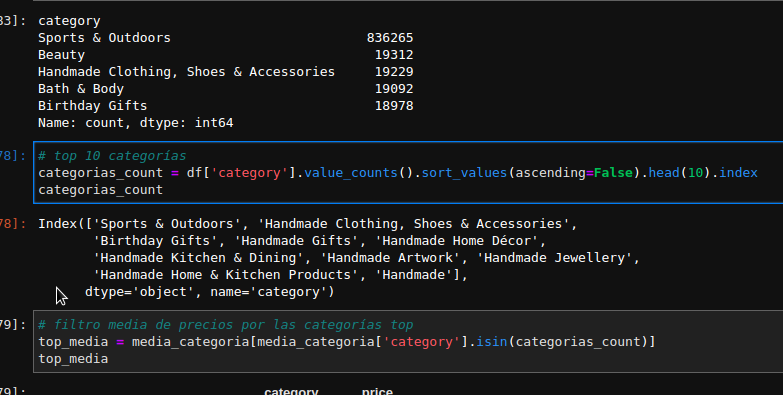

In [85]:
# filtro media de precios por las categorías top
top_media = media_categoria[media_categoria['category'].isin(categorias_count)]
top_media

,category,price
55,Sports & Outdoors,125.769814
173,Fragrances,36.202865
197,Birthday Gifts,26.585166
254,"Handmade Clothing, Shoes & Accessories",16.865767
256,Skin Care,16.340926
271,Bath & Body,15.042266
275,Hair Care,14.326030
279,Beauty,13.222322
285,Make-up,10.895356
288,Manicure & Pedicure Products,10.521108


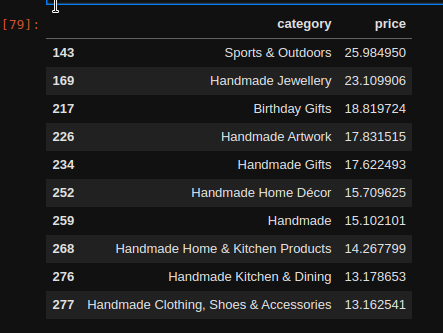

/home/isidre/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


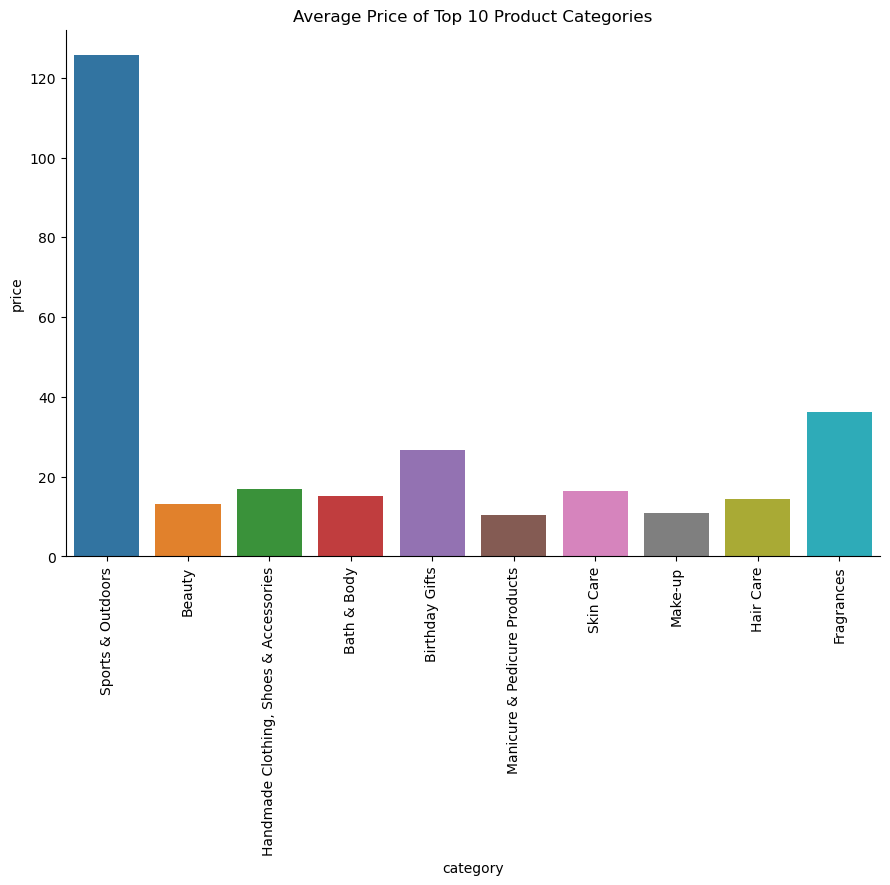

In [86]:
# Plotting
sns.catplot(data=top_media, x='category', y='price', kind='bar', 
            height=6, aspect=1.5, order=categorias_count)
plt.xticks(rotation=90)
plt.title('Average Price of Top 10 Product Categories')
plt.show()

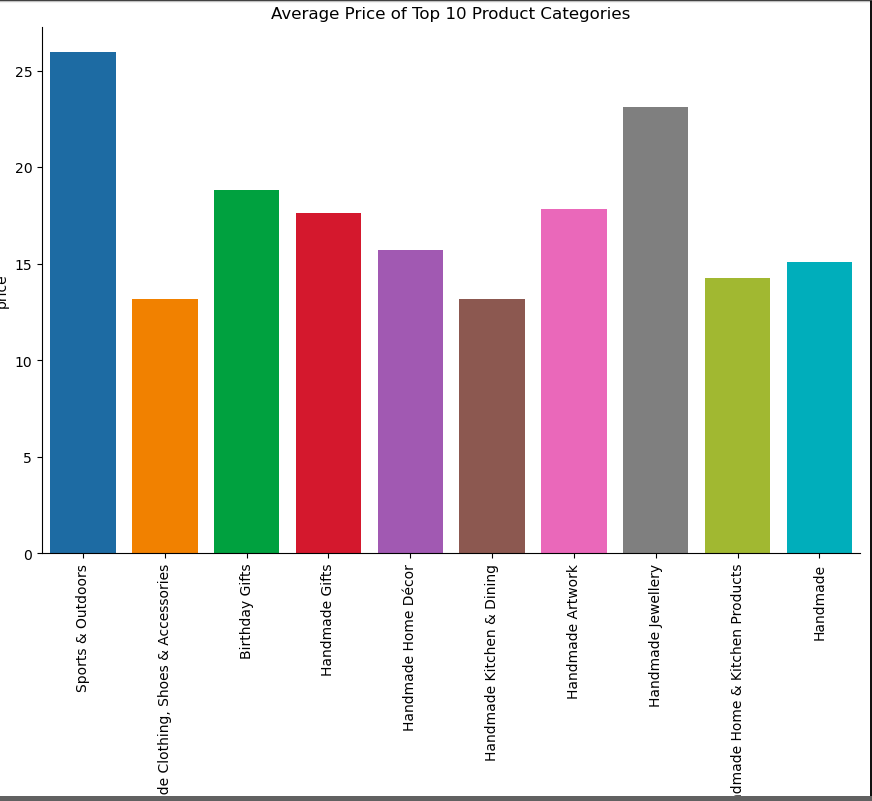

# Inferential Statistics

How to - Hypothesis Test !
In this case, we can use either z-test or z-test. We will go for t-test.

- Setting the Null Hypothesis (H0): The mean systolic blood pressure of the sample from Honolulu is = to the population mean systolic blood pressure (120)
- Setting up the Alternative Hypothesis (H1): The mean systolic blood pressure of the sample from Honolulu != to the population mean systolic blood pressure
- Determine the level of significance --> 00.5, 5% chance of rejecting the null hypothesis if it's true (Type I error)
- Calculate the t-statistics:

In [73]:
# mean systolic blood pressure
bp_mean = 120 

# Honolulu Heart Study
bp_sample = 100
bp_sample_mean = 130.1
bp_sample_std = 21.21

In [74]:
t_statistic2 = (bp_sample_mean - bp_mean) / (bp_sample_std / math.sqrt(bp_sample))
t_statistic2

4.761904761904759